**Weber probability**

Different Weber p-laws with the requirements that $p=f(\Delta C/C)$ and $f(\infty)=p_{norm}$ with $1/p_{norm}$ the number of neighbor cells.

We choose $f(x)=p_{norm}(1-exp(-\gamma x^{n_w}))$, where $\gamma$ is the weber coefficient and $n_w$ is the Weber exponent.

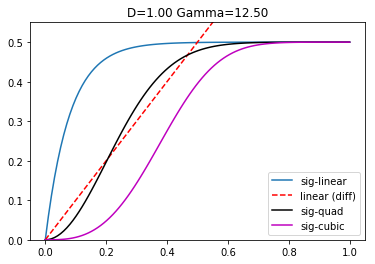

In [210]:
import numpy as np
import matplotlib.pyplot as plt

#________________parameters_______________
p_norm=0.5         #to have normailzed probability p_norm=1/neighbors
eps=0.0000000001   #Control on 0 concentration
gamma=12.5         #Weber coefficient
D=1.               #Diffusion coefficient
nw=2               #Weber exponent



def weber_sig(x,gamma):
    p_out=p_norm*(1-np.exp(-x*gamma))
    return p_out

gamma=12.5
x=np.linspace(0,1,100)
plot=[]
plot.append(plt.plot(x,weber_sig(x,gamma),label='sig-linear'))
plot.append(plt.plot(x,x,linestyle='dashed',color='r',label='linear (diff)'))
plot.append(plt.plot(x,weber_sig(x**2,gamma),color='k',label='sig-quad'))
#plot.append(plt.plot(x,1-np.exp(-(x**2)*gamma),color='k',label='sig-quad'))
plot.append(plt.plot(x,weber_sig(x**3,gamma),color='m',label='sig-cubic'))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,.55])
axes.set_title('D=%1.2f Gamma=%1.2f'%(D,gamma))
#axes.legend(plot[:],['a','b','c','d'])
axes.legend()

**Balance between Weber and Diffusion fluxes**

Here we consider the concentration flux due to Weber law and diffusion, separately and together.
Color code is intended positive (negative) when flux gpes from left (right) to right (left).
 Red thin lines indicates equilibrium stable solutions. Arrows mimic the flow and determine if
 equilibrium solutions are stable or unstable.

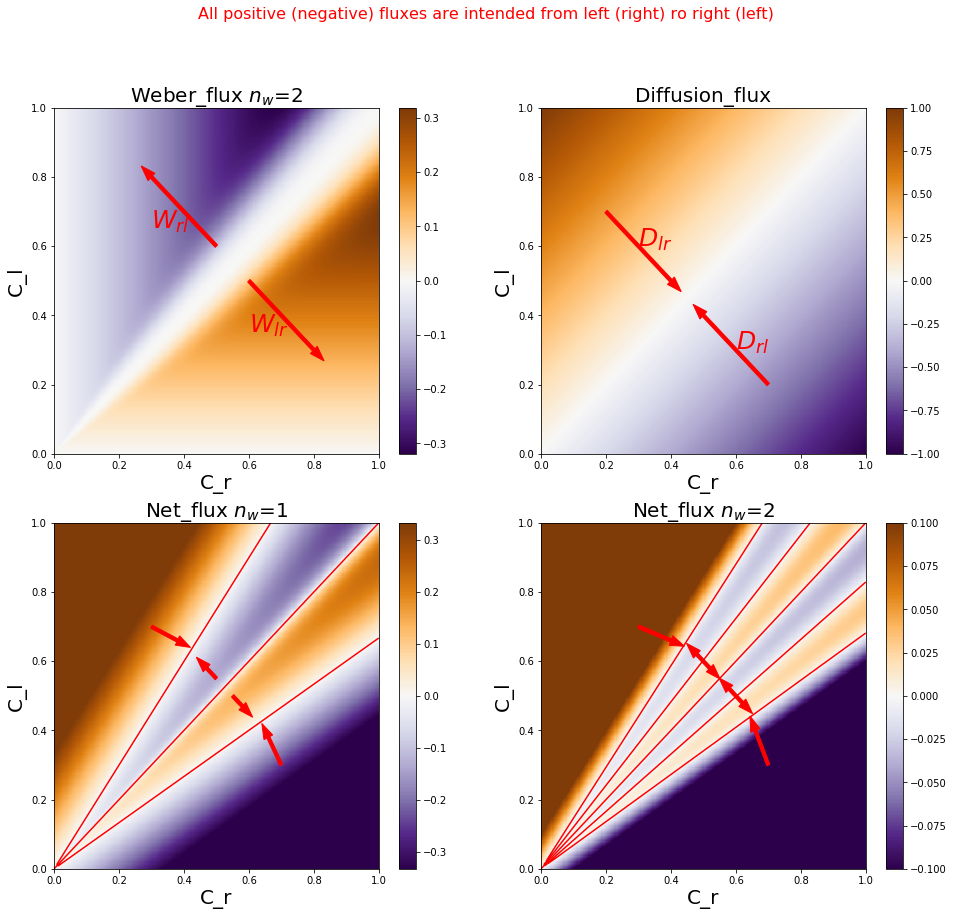

In [209]:
%matplotlib inline
import matplotlib.colors as colors 
import matplotlib.cm as cm



#______________Weber probability with control on O___________________
def weber_sig2(dc,c,nw,gamma):
    c_reg=(c>eps)*c+(c<eps)*eps
    p_out=p_norm*(1-np.exp(-(abs(dc/c_reg)**nw*gamma)))*(dc>0)*(c>eps)
    return p_out

#______________grid_contruction___________________
Cmax=1.
NN=300
c1=np.linspace(0,Cmax,NN); c2=np.linspace(0,Cmax,NN);
Cr,Cl=np.meshgrid(c2,c1)

#______diffusion flux_________
Dlr=(Cl-Cr)*(Cl-Cr>0)*D
Drl=(Cr-Cl)*(Cr-Cl>0)*D

#______weber flux_________
Wrl=weber_sig2(Cl-Cr,Cr,nw,gamma)        #nw power Weber law
Wlr=weber_sig2(Cr-Cl,Cl,nw,gamma)
Wrl_lin=weber_sig2(Cl-Cr,Cr,1,gamma)     #asymptotically linear Weber Law
Wlr_lin=weber_sig2(Cr-Cl,Cl,1,gamma)




fig,ax=plt.subplots(figsize=(16,14),ncols=2,nrows=2)
ax=ax.ravel()



c0=.2

#___________cmap____________
cmap=cm.get_cmap('PuOr_r')

#__________arrow parameters_______
Ax=0.5; Ay=0.5; Adx=0.2; Ady=0.2; W=0.01
txt_size=25


#______________diffusion_flux_________________
flux_D=Dlr-Drl
plot2=ax[1].pcolormesh(Cr,Cl,flux_D,cmap=cmap)
plot2.set_clim([-flux_D.max(),flux_D.max()])
ax[1].set_xlabel('C_r',fontsize=20)
ax[1].set_ylabel('C_l',fontsize=20)

ax[1].set_title('Diffusion_flux',fontsize=20)
plt.colorbar(plot2,ax=ax[1])


#______________Weber_flux (asym_quadratic)_____________
flux_w=Wlr*Cl-Wrl*Cr
plot3=ax[0].pcolormesh(Cr,Cl,flux_w,cmap=cmap)
plot3.set_clim([-flux_w.max(),flux_w.max()])
ax[0].set_xlabel('C_r',fontsize=20)
ax[0].set_ylabel('C_l',fontsize=20)

ax[0].set_title('Weber_flux $n_w$=%i'%(nw),fontsize=20)
plt.colorbar(plot3,ax=ax[0])


#______________net_flux (asym_linear)_____________
flux_1=Wlr_lin*Cl-Wrl_lin*Cr+Dlr-Drl

plot2=ax[2].pcolormesh(Cr,Cl,flux_1,cmap=cmap)
plot2.set_clim([-flux_1.max()/3,flux_1.max()/3])
#plot2.set_clim([-.05,0.3])
ax[2].set_xlabel('C_r',fontsize=20)
ax[2].set_ylabel('C_l',fontsize=20)
ax[2].contour(Cr,Cl,flux_1,[0.],colors='r')  #Draw 0-net flux lines


ax[2].set_title('Net_flux $n_w$=%i'%(1),fontsize=20)
plt.colorbar(plot2,ax=ax[2])

#______________net_flux (asym_quadratic)_________________
flux_n=Wlr*Cl-Wrl*Cr+Dlr-Drl
plot4=ax[3].pcolormesh(Cr,Cl,flux_n,cmap=cmap)
plot4.set_clim([-flux_n.max()/10,flux_n.max()/10])
ax[3].set_xlabel('C_r',fontsize=20)
ax[3].set_ylabel('C_l',fontsize=20)
ax[3].contour(Cr,Cl,flux_n,[0.],colors='r')  #Draw 0-net flux lines

ax[3].set_title('Net_flux $n_w$=%i'%(nw),fontsize=20)
plt.colorbar(plot4,ax=ax[3])
fig.suptitle("All positive (negative) fluxes are intended from left (right) ro right (left)",fontsize=16,color='r')
#plt.tight_layout()
#________________ARROWS__________________

ax[0].arrow(Ax+.1,Ay,Adx,-Ady,width=W,color='r')
ax[0].arrow(Ax,Ay+.1,-Adx,Ady,width=W,color='r')
ax[0].text(Ax-0.2, Ay+0.15, '$W_{rl}}$', color='r', size=txt_size)
ax[0].text(Ax+0.1, Ay-0.15, '$W_{lr}}$', color='r', size=txt_size)


ax[1].arrow(Ax-Adx-.1,Ay+Ady,Adx,-Ady,width=W,color='r')
ax[1].arrow(Ax+Adx,Ay-Ady-.1,-Adx,Ady,width=W,color='r')
ax[1].text(Ax-0.2, Ay+0.1, '$D_{lr}}$', color='r', size=txt_size)
ax[1].text(Ax+0.1, Ay-0.2, '$D_{rl}}$', color='r', size=txt_size)


ax[2].arrow(Ax+.05,Ay,Adx*.15,-Ady*.15,width=W,color='r')
ax[2].arrow(Ax,Ay+.05,-Adx*.15,Ady*.15,width=W,color='r')
ax[2].arrow(Ax-Adx,Ay+Ady,Adx*.4,-Ady*.2,width=W,color='r')
ax[2].arrow(Ax+Adx,Ay-Ady,-Adx*.2,Ady*.4,width=W,color='r')


ax[3].arrow(Ax+.1,Ay,-Adx*.1,Ady*.1,width=W,color='r')
ax[3].arrow(Ax,Ay+.1,Adx*.1,-Ady*.1,width=W,color='r')
ax[3].arrow(Ax+.1,Ay,Adx*.1,-Ady*.1,width=W,color='r')
ax[3].arrow(Ax,Ay+.1,-Adx*.1,Ady*.1,width=W,color='r')
ax[3].arrow(Ax-Adx,Ay+Ady,Adx*.5,-Ady*.2,width=W,color='r')
ax[3].arrow(Ax+Adx,Ay-Ady,-Adx*.2,Ady*.5,width=W,color='r')
